# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [ ]:
import os                                                   # Importing the os module
import pandas as pd                                         # Importing the pandas library and renaming it as pd
import numpy as np                                          # Importing the numpy library and renaming it as np
import matplotlib.pyplot as plt                             # Importing the matplotlib.pyplot library and renaming it as plt
%matplotlib inline                                          # Setting the backend of matplotlib to inline
from sklearn.linear_model import LinearRegression           # Importing the LinearRegression model from scikit-learn
from sklearn.metrics import r2_score,mean_squared_error     # Importing the r2_score and mean_squared_error metrics from scikit-learn



### Reading the dataset

In [ ]:
#load dataset
data = pd.read_csv('/content/Data1.txt',header = None) #Read from dataset
data.columns = ['Population','Profit']
data


,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
#describe the dataframe
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [ ]:
#plot

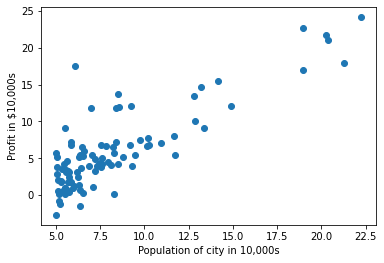

In [ ]:
plt.scatter(data['Population'],data['Profit'])
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Function to compute the cost function 

In [ ]:
### Function to compute the cost function 

In [ ]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [ ]:
#insert column with 1s
data.insert(0, 'Ones', 1)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


### Set training data (X) and target variable (y)

In [ ]:
from sklearn.model_selection import train_test_split
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [ ]:
#converting X,y into numpy matrix
X = np.matrix(X.values)
y = np.matrix(y.values)
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


In [ ]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [ ]:
def gradiantDescent(x,y,theta,alpha,n):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    cost = np.zeros(n)

    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(n):
        
        error = (x *theta.T)-y
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range (parameters):
        
        
            term = np.multiply(error , x[: , j])
            temp[0,j] = theta[0,j] - ((alpha /len(x)) *np.sum(term))
        
        theta = temp
        cost[i] = computeCost(x,y,theta)
    
    return theta , cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [ ]:
# take alpha 0.01 
# iters=1000
alpha = 0.01
n = 1000


g, cost = gradiantDescent(X,y,theta,alpha,n)
g

matrix([[-3.24140214,  1.1272942 ]])




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

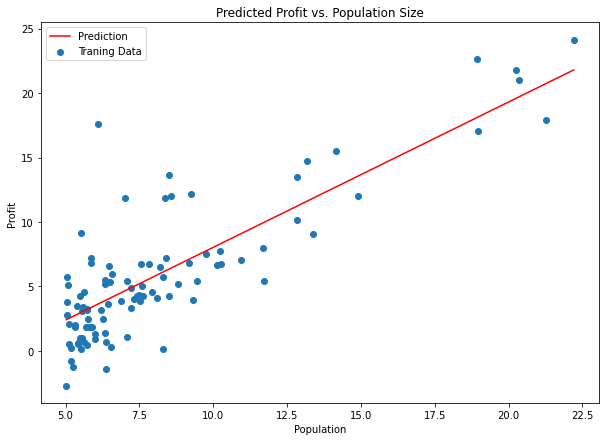

In [ ]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

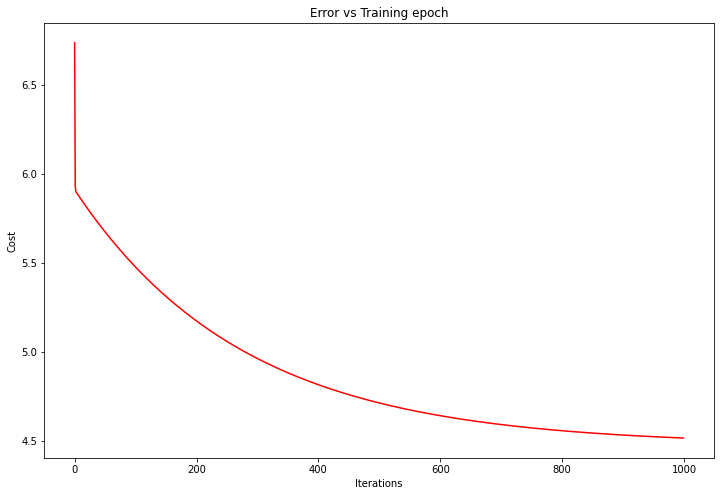

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(n), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [ ]:
#fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict the target values
pred = model.predict(X_test)

In [ ]:
#evalute the model
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))
import sklearn.metrics as m

from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, pred))

Mean Squared Error: 7.437443254518797
Root Mean Squared Error: 2.727167624939618
Mean Absolute Error: 2.131795240231005
R^2: 0.33277307953790625


In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [ ]:
results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,7.437443
1,RMSE,2.727168
2,MAE,2.131795
3,r2,0.332773
4,adj_r2,0.272116
